In [2]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.cosmology import WMAP9 as cosmo
import astropy.units as u
from hmf import MassFunction
from scipy.integrate import quad

plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'

In [3]:
hmf = MassFunction(Mmin=8, Mmax=13)
M = hmf.m

In [4]:
cosmo.differential_comoving_volume(z=1)

<Quantity 2.82086026e+10 Mpc3 / sr>

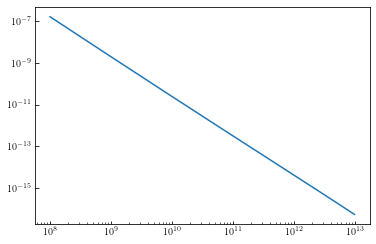

In [5]:
plt.plot(M, hmf.dndm)
plt.xscale('log')
plt.yscale('log')

## Star Formation Rate

### Star Formation Rate Test

In [6]:
def star_formation_rate(M, sim_num = 1, z = 7):
    '''
    Returns the star-formation rate for a dark-matter halo of a given mass and redshift
    
    Units: M_sun per year
    
    
    Note: Zero-out redshift for now. Other versions of this equation use redshift but the current
          sim that I am basing this equation off of does not use redshift.
    
    https://arxiv.org/pdf/1205.1493.pdf
    
    '''
    
    if sim_num == 1:
        a, b, d, c1, c2 = 2.8, -0.94, -1.7, 1e9, 7e10
        sfr = 2.8e-28 * (M ** a) * (1.0 + M / c1) ** b * (1.0 + M / c2) ** d
        
    if sim_num == 2:
        a, b, d, e, c1, c2, c3 = 2.59, -0.62, 0.4, -2.25, 8e8, 7e9, 1e11
        sfr = 1.6e-26 * (M ** a) * (1.0 + M / c1) ** b * (1.0 + M / c2) ** d * (1.0 + M / c3) ** e
        
    if sim_num == 3:
        a, b, d, e, c1, c2, c3 = 2.59, -0.62, 0.4, -2.25, 8e8, 7e9, 1e11
        sfr = 2.25e-26 * (1.0 + 0.075 * (z-7)) * (M ** a) * (1.0 + M / c1) ** b * (1.0 + M / c2) ** d * (1.0 + M / c3) ** e
    
    return sfr * u.M_sun / u.year

In [7]:
for i in [1,2,3]:
    print (star_formation_rate(1e8, sim_num=i))

6.41497465381e-06 solMass / yr
7.83236409554e-06 solMass / yr
1.10142620093e-05 solMass / yr


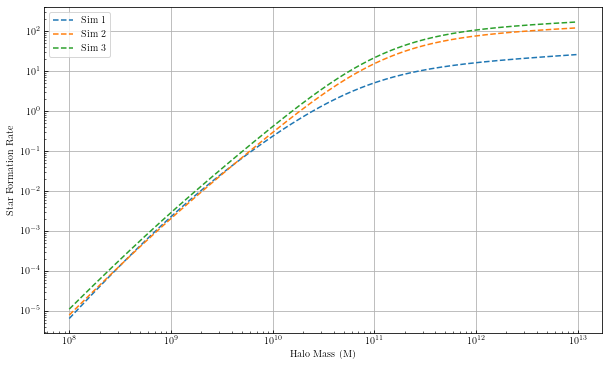

In [8]:
plt.figure(figsize=(10,6))
for i in [1, 2, 3]:
    plt.plot(M, star_formation_rate(M, sim_num=i), '--', label = 'Sim {}'.format(i))
plt.xscale('log')
plt.yscale('log')
plt.grid()
plt.legend()
plt.xlabel(r'Halo Mass (M)')
plt.ylabel('Star Formation Rate')
plt.show()

# Ly-$\alpha$ Intensity

### Galactic Contribution

In [9]:
def H(z):
    '''
    Returns astropy Hubble constant at given redshift
    
    Units: km Mpc^-1 s^-1
    '''
    return cosmo.H(z)

def y(z, wl_lya = 2.46e-18):
    '''
    
    wl_lya -> Lyman-alpha wavelength in units of km
    
    Returns value in units of Mpc s
    '''
    return wl_lya * u.km * (1.0 + z) ** 2 / H(z)

def L_gal(M, sim_num=1):
    '''
    Returns galactic component of the luminosity
    '''
    return 1.1e42 * star_formation_rate(M, sim_num) * (u.year / u.M_sun) * (u.erg / u.s)

def I_gal(M, z):
    intensity = y(z) * L_gal(M) * cosmo.angular_diameter_distance(z)** 2 / (4 * np.pi *cosmo.luminosity_distance(z) ** 2)
    return intensity

def abc(M_halo):
    return hmf.dndm * I_gal(M_halo, z).value

def I_gal_bar(M_min, M_max, z):
    hmf.update(z = z)
    return quad(abc, M.min(), M.max())


In [10]:
z = 7

In [11]:
I_gal(M, 7)

<Quantity [2.56153103e+13, 2.72653793e+13, 2.90204851e+13, 3.08872068e+13,
           3.28725266e+13, 3.49838539e+13, 3.72290502e+13, 3.96164564e+13,
           4.21549208e+13, 4.48538289e+13, 4.77231352e+13, 5.07733962e+13,
           5.40158060e+13, 5.74622332e+13, 6.11252598e+13, 6.50182233e+13,
           6.91552598e+13, 7.35513500e+13, 7.82223682e+13, 8.31851331e+13,
           8.84574619e+13, 9.40582275e+13, 1.00007418e+14, 1.06326199e+14,
           1.13036984e+14, 1.20163499e+14, 1.27730860e+14, 1.35765649e+14,
           1.44295998e+14, 1.53351671e+14, 1.62964160e+14, 1.73166775e+14,
           1.83994746e+14, 1.95485331e+14, 2.07677920e+14, 2.20614161e+14,
           2.34338071e+14, 2.48896173e+14, 2.64337628e+14, 2.80714374e+14,
           2.98081278e+14, 3.16496289e+14, 3.36020607e+14, 3.56718844e+14,
           3.78659217e+14, 4.01913725e+14, 4.26558356e+14, 4.52673286e+14,
           4.80343102e+14, 5.09657029e+14, 5.40709165e+14, 5.73598734e+14,
           6.08430344e+14

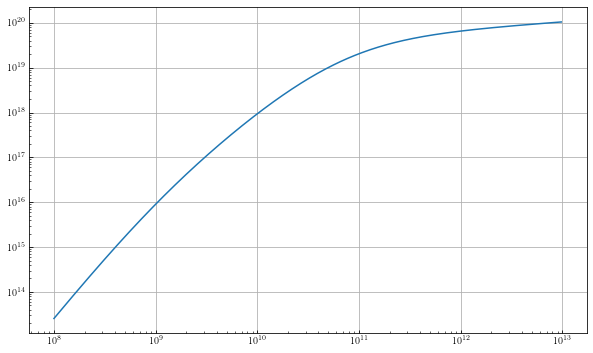

In [12]:
plt.figure(figsize=(10,6))
plt.plot(M, I_gal(M, z))
plt.xscale('log')
plt.yscale('log')
plt.grid()

### asdf

In [13]:
I_gal_bar(M, 7)

TypeError: I_gal_bar() takes exactly 3 arguments (2 given)

### IGM Component

Skip confusing galactic component for now

In [14]:
'''

Helper functions to calculation the Lyman-alpha luminosity density

'''

Y_p = 0.24

def n_rec_dot(z, T_k, x_i):
    '''
    '''
    return alpha(T_k, z) * n_e(x_i, z) * n_HII(x_i, z)
    
def n_b(z):
    '''
    '''
    return 1.905e-7 * (1.0 + z) ** 3 * u.cm ** -3 

def alpha(T_k, z):
    '''
    '''
    return 4.2e-13 * (T_k / 1e4) ** -0.7 * (1.0 + z)**3 * u.cm**3 / u.s

def n_HII(x_i, z):
    '''
    '''
    return x_i * n_b(z) * (1.0 - Y_p) / (1.0 - 3.0 / 4.0 * Y_p)
    
def n_e(x_i, z):
    '''
    '''
    return x_i * n_b(z)

def n_HI(x_i, z):
    '''
    '''
    return (1.0 - x_i) * n_b(z) * (1.0 - Y_p) / (1.0 - 3.0 / 4.0 * Y_p)

def f_rec(T_k):
    '''
    '''
    return 0.686 - 0.106 * np.log10(T_k / 1e4) - 0.009 * (T_k / 1e4) ** -0.4

In [15]:
def l_rec(z, T_k, x_i):
    '''
    E_Lya: 
    '''
    
    E_Lya = 1.637e-11 * u.erg
    
    return f_rec(T_k) * n_rec_dot(z, T_k, x_i) * E_Lya

def I_rec_IGM(z, T_k, x_i):
    '''
    '''
    return l_rec(z, T_k, x_i) * y(z) * cosmo.angular_diameter_distance(z)** 2 / (4 * np.pi *cosmo.luminosity_distance(z) ** 2)

def correct_units(I):
    '''
    '''
    nu_lya = 2.47e15
    return I * u.Mpc.to('cm') * u.cm / u.Mpc * nu_lya * 1.0 / u.s

In [16]:
x_i = 0.25

In [17]:
correct_units(I_rec_IGM(7, 2e4, x_i))

<Quantity 2.13846234e-14 erg / (cm2 s)>

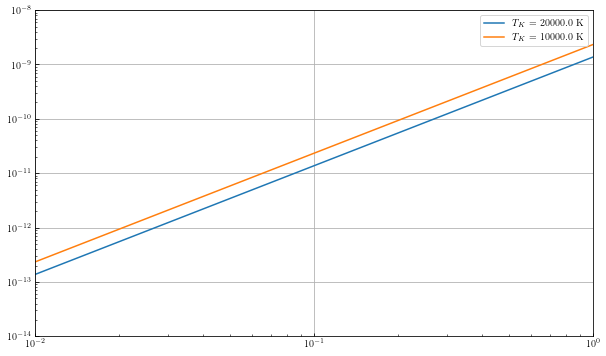

In [24]:
x_i = np.linspace(0.01,1.4,1000)

plt.figure(figsize=(10,6))
plt.plot(x_i, 4e3 * correct_units(I_rec_IGM(7, 2e4, x_i)), label = r'$T_K$ = {} K'.format(2e4))
plt.plot(x_i, 4e3 * correct_units(I_rec_IGM(7, 1e4, x_i)), label = r'$T_K$ = {} K'.format(1e4))
plt.xlim([0.01,1])
plt.ylim([1e-14, 1e-8])
plt.xscale('log')
plt.yscale('log')
plt.legend()
plt.grid()
plt.show()

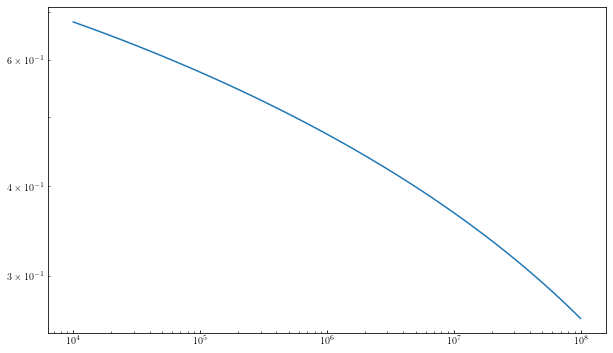

In [24]:
T_k = np.logspace(4,8,100)
plt.figure(figsize=(10,6))
plt.plot(T_k, f_rec(T_k))
plt.xscale('log')
plt.yscale('log')
plt.show()

In [25]:
alpha(1e4, 7)

<Quantity 2.1504e-10 cm3 / s>